In [1]:
import ee
import datetime
import os
import itertools
import sys
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geemap

import subprocess
from subprocess import PIPE

In [2]:
ee.Initialize()

In [3]:
# append upper folder into sys-path during run time so we can
# import our own moduls
sys.path.append('..')

In [4]:
from BackGround_modules.Class_2_Classify_Fourier_Img   import Classification
from BackGround_modules.Class_3_Calculate_the_accuracy import Accuracy_assesment
from BackGround_modules.Class_4_Create_Sample_Classification_instancs import Make_Sample_Classification

##### Define_Basic_Parameters

In [5]:
# define the year_name for test, here choose these years because they represent
# Landsat8/7/5 respectively
year_name     = ['2017_2019','2011_2013', '2008_2010']
percent_value = [0,1,2,3,5,7,10,20,30,50,70,100]
tree_num      = [1] + list(range(10,121,10))

In [6]:
combination_name = ['Landsat',
                    'Fourier',
                    'Landsat_Fourier',
                    'Landsat_Mean',
                    'Fourier_Mean',
                    'Landsat_Fourier_Mean']

##### Classify Sample_with_img_value

In [10]:
# define the path to point_with_value GEE-Path
path = 'users/Jinzhu_Deakin/North_China_Plain/Sample_with_Landsat_Fourier_Normalized'

# instantiate the combo_instance dictionary
Combo_visual = {}
Combo_invariant   = {}

# Create sample_classification instances through [year] --> [Percent] --> [band_combination] --> [Tree]
for year in year_name:

    # get the visual inspected samples
    Sample_visual_inspect = ee.FeatureCollection(f'{path}/Each_year_visual_check_{year}')
    # get the invarient sample
    Invarient_built = ee.FeatureCollection(f'{path}/Invarient_built_{year}')
    Invarient_non_Built  = ee.FeatureCollection(f'{path}/Invarient_non_built_{year}')
    Invarient_sample = Invarient_built.merge(Invarient_non_Built)
   
    # Get the band_combo names
    Band_combo   = Make_Sample_Classification.Step_2_Create_Band_Combo(Sample_visual_inspect)

    for combo in Band_combo:
        # for each band-combination, calculate the accuracy using tree_num
        Visual_inpect_instance = Make_Sample_Classification.Step_3_Create_Classification_Instance(year,Sample_visual_inspect,
                                                                                          combo,tree_num,
                                                                                          100,classificaiton_func = Classification )
        Invarient_instance = Make_Sample_Classification.Step_3_Create_Classification_Instance(year,Invarient_sample,
                                                                                          combo,tree_num,
                                                                                          100,classificaiton_func = Classification )
        
        # add the instance into the dictionary
        Combo_visual.update(Visual_inpect_instance)
        Combo_invariant.update(Invarient_instance)

Classification of 2017_2019_Landsat_pct_100_tree_0001 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0010 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0020 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0030 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0040 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0050 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0060 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0070 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0080 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0090 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0100 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0110 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0120 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0001 completed!
Classification of 2017_2019_Landsat_pct_100_tree_0010 completed!
Classification of 2017_20

Classification of 2011_2013_Landsat_pct_100_tree_0001 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0010 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0020 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0030 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0040 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0050 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0060 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0070 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0080 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0090 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0100 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0110 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0120 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0001 completed!
Classification of 2011_2013_Landsat_pct_100_tree_0010 completed!
Classification of 2011_20

Classification of 2008_2010_Landsat_pct_100_tree_0001 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0010 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0020 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0030 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0040 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0050 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0060 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0070 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0080 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0090 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0100 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0110 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0120 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0001 completed!
Classification of 2008_2010_Landsat_pct_100_tree_0010 completed!
Classification of 2008_20

##### Compute and unpack the acc_value 

In [ ]:
Combo_visual = {}
Combo_invariant 

In [11]:
# innitialize the accuracy dict
Acc_each_year_AND_Village = {}

# innitilize operation flag to report the process
Opts_flat  = 0
Opts_tatal = len(year_name) * len(combination_name) * len(tree_num)

# unpack the combo_instance through [year] --> [band_combination] --> [Percent] --> [Tree]
for year in year_name:
    for name in combination_name:
        for pct in [100]:
            for tree in tree_num:

                Opts_flat+=1

                Acc_each_year_AND_Village[('Visaull',year,name,pct,tree)] = Accuracy_assesment(Combo_visual[(year,name,pct,tree)])\
                                                                        .Stp_1_Calculate_Accuracy()
                
                Acc_each_year_AND_Village[('Invarient',year,name,pct,tree)]   = Accuracy_assesment(Combo_invariant[(year,name,pct,tree)])\
                                                                        .Stp_1_Calculate_Accuracy()
                # print out the process
                print(f'{year}_{name}_pct_{pct:03}_tree_{tree:03} accuracy computation finished! ==>{Opts_flat:03}/{Opts_tatal}')
            print('_________________')

2017_2019_Landsat_pct_100_tree_001 accuracy computation finished! ==>001/234
2017_2019_Landsat_pct_100_tree_010 accuracy computation finished! ==>002/234
2017_2019_Landsat_pct_100_tree_020 accuracy computation finished! ==>003/234
2017_2019_Landsat_pct_100_tree_030 accuracy computation finished! ==>004/234
2017_2019_Landsat_pct_100_tree_040 accuracy computation finished! ==>005/234
2017_2019_Landsat_pct_100_tree_050 accuracy computation finished! ==>006/234
2017_2019_Landsat_pct_100_tree_060 accuracy computation finished! ==>007/234
2017_2019_Landsat_pct_100_tree_070 accuracy computation finished! ==>008/234
2017_2019_Landsat_pct_100_tree_080 accuracy computation finished! ==>009/234
2017_2019_Landsat_pct_100_tree_090 accuracy computation finished! ==>010/234
2017_2019_Landsat_pct_100_tree_100 accuracy computation finished! ==>011/234
2017_2019_Landsat_pct_100_tree_110 accuracy computation finished! ==>012/234
2017_2019_Landsat_pct_100_tree_120 accuracy computation finished! ==>013/234

2011_2013_Fourier_pct_100_tree_090 accuracy computation finished! ==>101/234
2011_2013_Fourier_pct_100_tree_100 accuracy computation finished! ==>102/234
2011_2013_Fourier_pct_100_tree_110 accuracy computation finished! ==>103/234
2011_2013_Fourier_pct_100_tree_120 accuracy computation finished! ==>104/234
_________________
2011_2013_Landsat_Fourier_pct_100_tree_001 accuracy computation finished! ==>105/234
2011_2013_Landsat_Fourier_pct_100_tree_010 accuracy computation finished! ==>106/234
2011_2013_Landsat_Fourier_pct_100_tree_020 accuracy computation finished! ==>107/234
2011_2013_Landsat_Fourier_pct_100_tree_030 accuracy computation finished! ==>108/234
2011_2013_Landsat_Fourier_pct_100_tree_040 accuracy computation finished! ==>109/234
2011_2013_Landsat_Fourier_pct_100_tree_050 accuracy computation finished! ==>110/234
2011_2013_Landsat_Fourier_pct_100_tree_060 accuracy computation finished! ==>111/234
2011_2013_Landsat_Fourier_pct_100_tree_070 accuracy computation finished! ==>11

2008_2010_Landsat_Mean_pct_100_tree_030 accuracy computation finished! ==>199/234
2008_2010_Landsat_Mean_pct_100_tree_040 accuracy computation finished! ==>200/234
2008_2010_Landsat_Mean_pct_100_tree_050 accuracy computation finished! ==>201/234
2008_2010_Landsat_Mean_pct_100_tree_060 accuracy computation finished! ==>202/234
2008_2010_Landsat_Mean_pct_100_tree_070 accuracy computation finished! ==>203/234
2008_2010_Landsat_Mean_pct_100_tree_080 accuracy computation finished! ==>204/234
2008_2010_Landsat_Mean_pct_100_tree_090 accuracy computation finished! ==>205/234
2008_2010_Landsat_Mean_pct_100_tree_100 accuracy computation finished! ==>206/234
2008_2010_Landsat_Mean_pct_100_tree_110 accuracy computation finished! ==>207/234
2008_2010_Landsat_Mean_pct_100_tree_120 accuracy computation finished! ==>208/234
_________________
2008_2010_Fourier_Mean_pct_100_tree_001 accuracy computation finished! ==>209/234
2008_2010_Fourier_Mean_pct_100_tree_010 accuracy computation finished! ==>210/23

In [12]:
# # convert the accuracy dicionary into a dataframe
# Acc_Visual_and_Invarient_df = pd.DataFrame(Acc_each_year_AND_Village).T
# Acc_Visual_and_Invarient_df.index.names = ['Type','Year','Combo','Percent','Tree']

# # save the dataframe
# Acc_Visual_and_Invarient_df.to_csv('./Step_3_result/Classification_ACC_Visual_and_Invarient.csv')

In [13]:
Acc_Visual_and_Invarient_df = pd.read_csv('./Step_3_result/Classification_ACC_Each_and_Invarient.csv')
Acc_Visual_and_Invarient_df.set_index('Tree')
Acc_Visual_and_Invarient_df.drop('Percent',1,inplace = True)

In [15]:
Acc_Visual_and_Invarient_df

,Type,Year,Combo,Tree,Overall_ACC,Precisioin_non_built,Precisioin_built,Recall_non_built,Recall_built
0,Each_year,2017_2019,Landsat,1,88.71,89.25,88.11,89.12,88.26
1,Invarient,2017_2019,Landsat,1,77.75,77.25,78.24,77.72,77.78
2,Each_year,2017_2019,Landsat,10,92.68,91.39,94.22,94.94,90.22
3,Invarient,2017_2019,Landsat,10,83.07,81.07,85.23,85.60,80.60
4,Each_year,2017_2019,Landsat,20,92.76,91.77,93.92,94.63,90.72
...,...,...,...,...,...,...,...,...,...
463,Invarient,2008_2010,Landsat_Fourier_Mean,100,92.58,91.77,93.45,93.68,91.48
464,Each_year,2008_2010,Landsat_Fourier_Mean,110,97.21,96.37,98.15,98.31,96.04
465,Invarient,2008_2010,Landsat_Fourier_Mean,110,92.58,91.89,93.32,93.53,91.63
466,Each_year,2008_2010,Landsat_Fourier_Mean,120,97.13,96.23,98.14,98.31,95.88


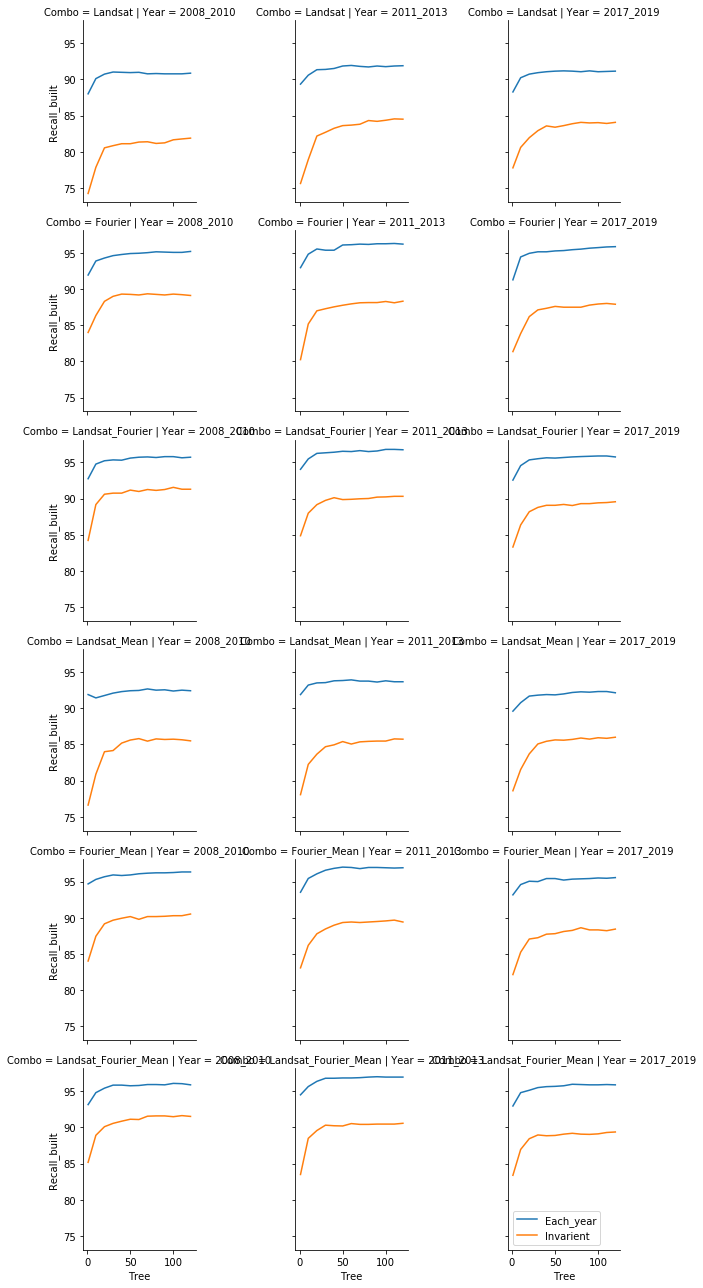

In [18]:
fig = sns.FacetGrid(data =Acc_Visual_and_Invarient_df,
                   row = 'Combo',
                   col = 'Year',
                   hue = 'Type')

fig.map(sns.lineplot, 'Tree','Recall_built')
plt.legend()